# Simulation Problem 7
## ML HW_4

#### import libraries and load dataset

Reading the cdb files using the instruction of this repository: <br>
https://github.com/amir-saniyan/HodaDatasetReader

In [1]:
from HodaDataSetReader import read_hoda_dataset
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

os.chdir("/home/kassra/ML/HW_4/data/DigitDB")
X_train, Y_train = read_hoda_dataset(dataset_path='Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)
X_test, Y_test = read_hoda_dataset(dataset_path='Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=True,
                              reshape=True)

In [2]:
Y_test = np.argmax(Y_test, axis=1)

#### Visualize some photos

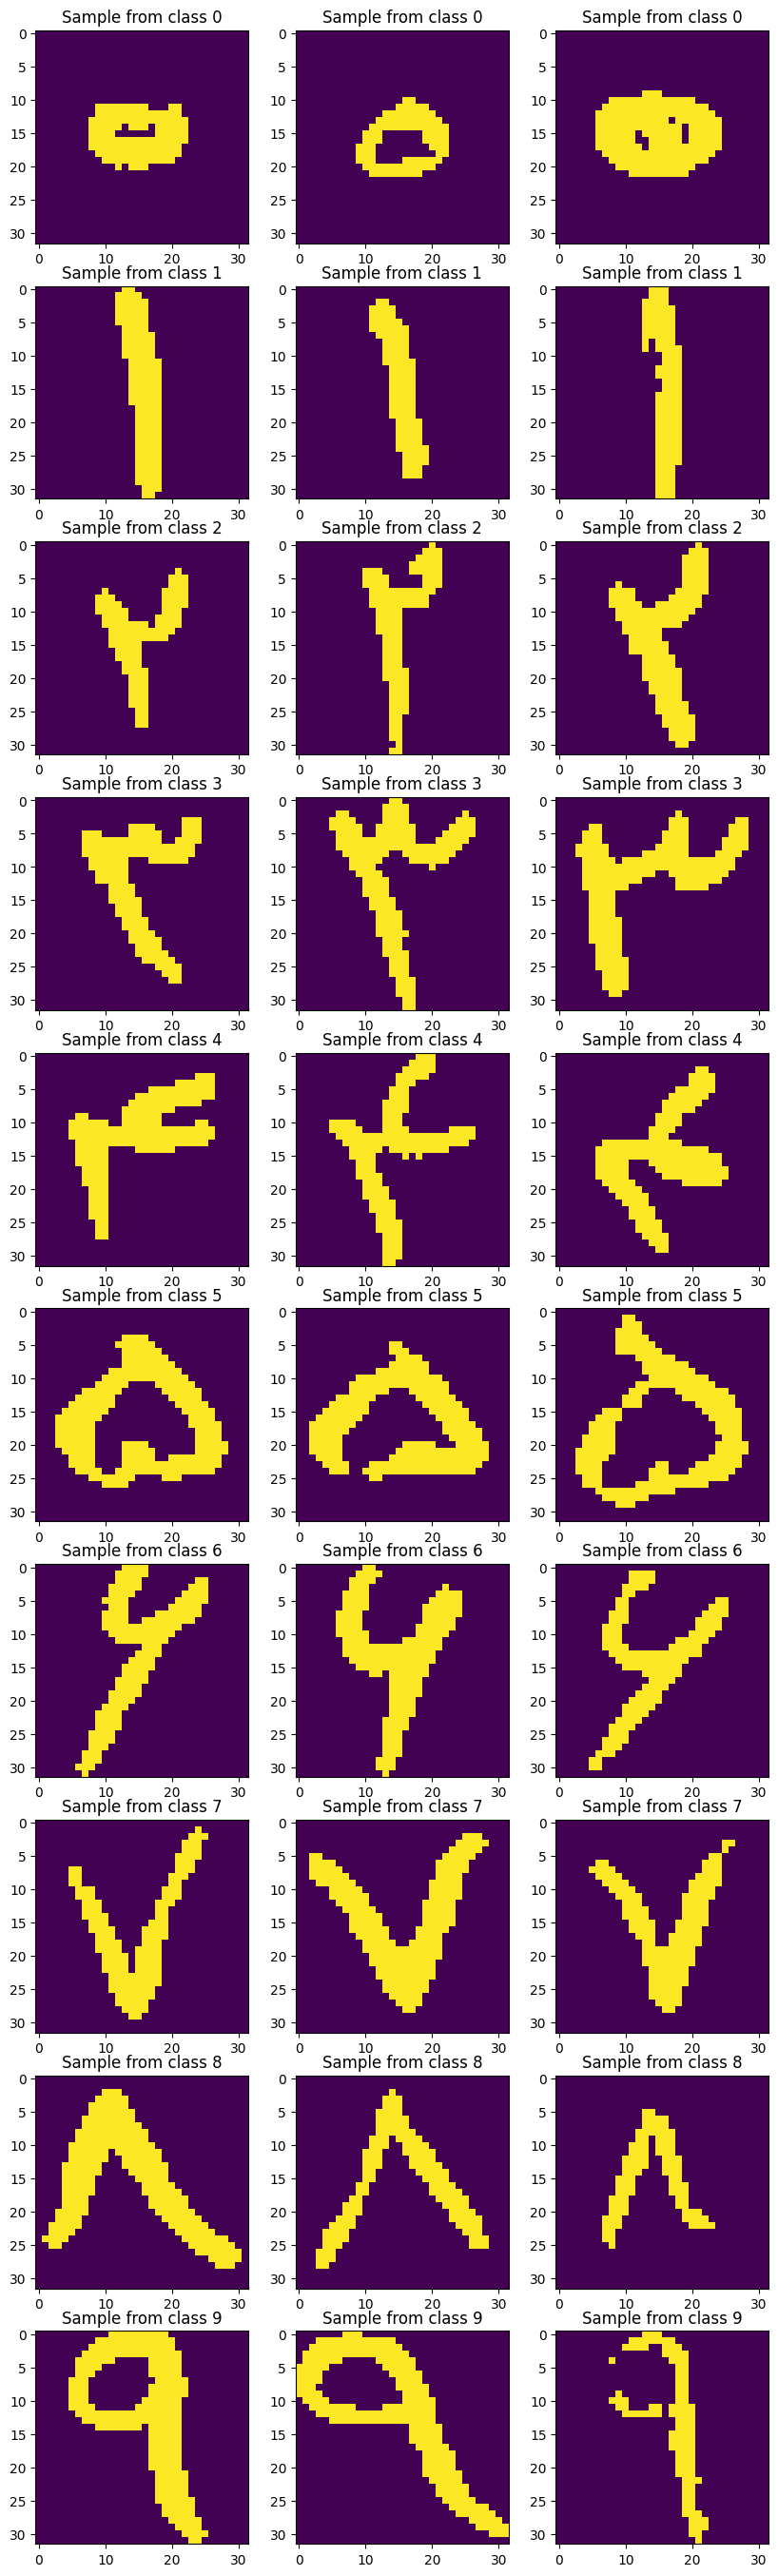

In [18]:
counter = 0
i = 0
j = 0

fig, ax = plt.subplots(10, 3)
fig.set_dpi(100)
fig.set_size_inches(10, 35)

while counter != 10:
    if Y_train[i] == counter:
        ax[int(counter), j].imshow(X_train[i].reshape(32,32))
        ax[int(counter), j].set_title("Sample from class "+str(counter))
        j += 1
        if j == 3:
            j = 0
            counter += 1
        i += 1
    else:
        i += 1



Normalized Dataset

In [3]:
def normalize(x):
    sum = x.sum(axis=1)
    return x/sum[:,np.newaxis]

X_train_nor = normalize(X_train)
X_test_nor = normalize(X_test)

#### K-NN Class for Classification

In [4]:
class KNN:
    def __init__(self, k, x, y):
        self.n_class = np.shape(np.unique(y))[0]
        self.n_sample = np.shape(x)[0]
        self.n_feature = np.shape(x)[1]
        self.k = k
        self.x = x
        self.y = y
        pass

    def dist(self, x, y):
        return np.linalg.norm(x - y, axis=1)

    def predict(self, x):
        y = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            distances = self.dist(x[i], self.x)
            neighbours_id = np.argsort(distances)
            neighbours = self.y[neighbours_id[:self.k]]

            values, counts = np.unique(neighbours, return_counts=True)
            ind = np.argmax(counts)
            y[i] = values[ind]
        return y

In [46]:
classifier = KNN(5, X_train, Y_train)
y_predict = classifier.predict(X_test)

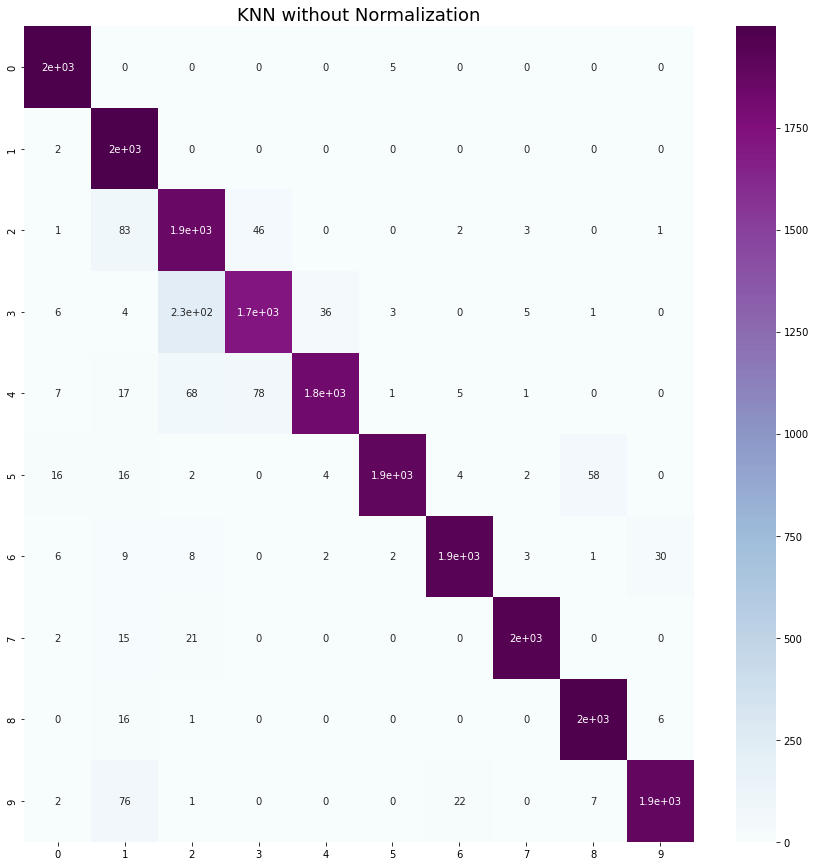

[0.98835769 0.94378838 0.88825351 0.89288507 0.94333765 0.97109235
 0.97633434 0.98692153 0.97774481 0.96309494]


In [47]:
plt.figure(figsize = (15,15))
sns.heatmap(confusion_matrix(Y_test, y_predict), annot=True, cmap="BuPu")
plt.title("KNN without Normalization", fontsize = 18)
plt.show()
print(f1_score(Y_test, y_predict, average=None))

With normalized data

In [5]:
classifier = KNN(5, X_train_nor, Y_train)
y_predict = classifier.predict(X_test_nor)

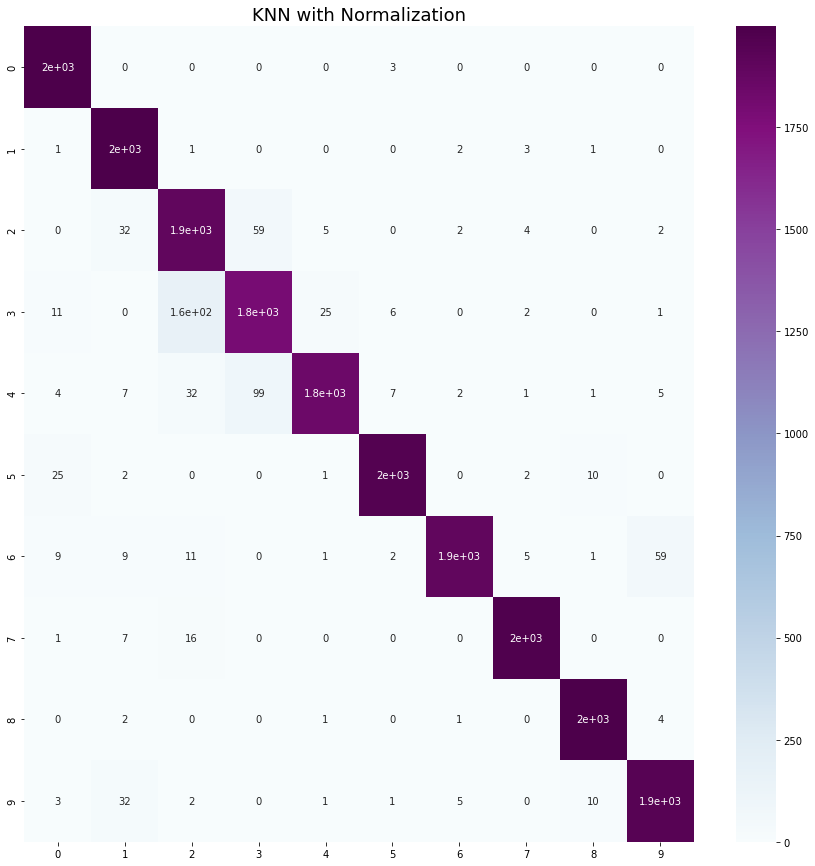

[0.9859294  0.97575312 0.91971865 0.90678825 0.9504644  0.98517215
 0.97215837 0.98973203 0.99227895 0.96888225]


In [6]:
plt.figure(figsize = (15,15))
sns.heatmap(confusion_matrix(Y_test, y_predict), annot=True, cmap="BuPu")
plt.title("KNN with Normalization", fontsize = 18)
plt.show()
print(f1_score(Y_test, y_predict, average=None))

#### D (Scikit Learn)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)

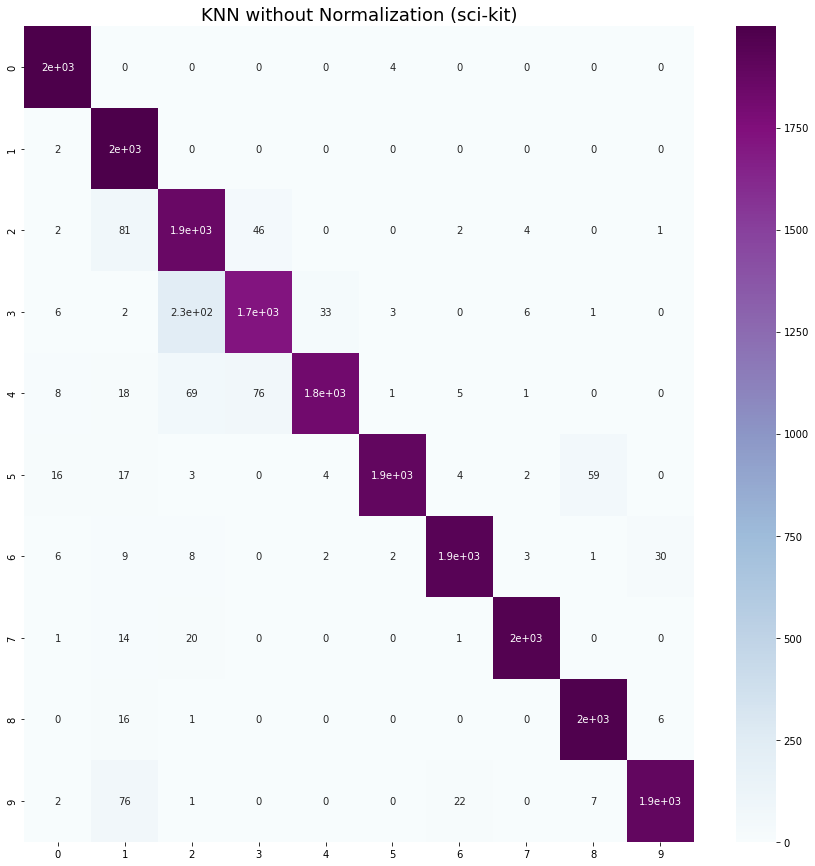

[0.98836346 0.94445758 0.8884652  0.89507941 0.94379694 0.97055058
 0.9760886  0.98693467 0.97750309 0.96309494]


In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(confusion_matrix(Y_test, y_predict), annot=True, cmap="BuPu")
plt.title("KNN without Normalization (sci-kit)", fontsize = 18)
plt.show()
print(f1_score(Y_test, y_predict, average=None))

In [11]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_nor, Y_train)
y_predict = model.predict(X_test_nor)

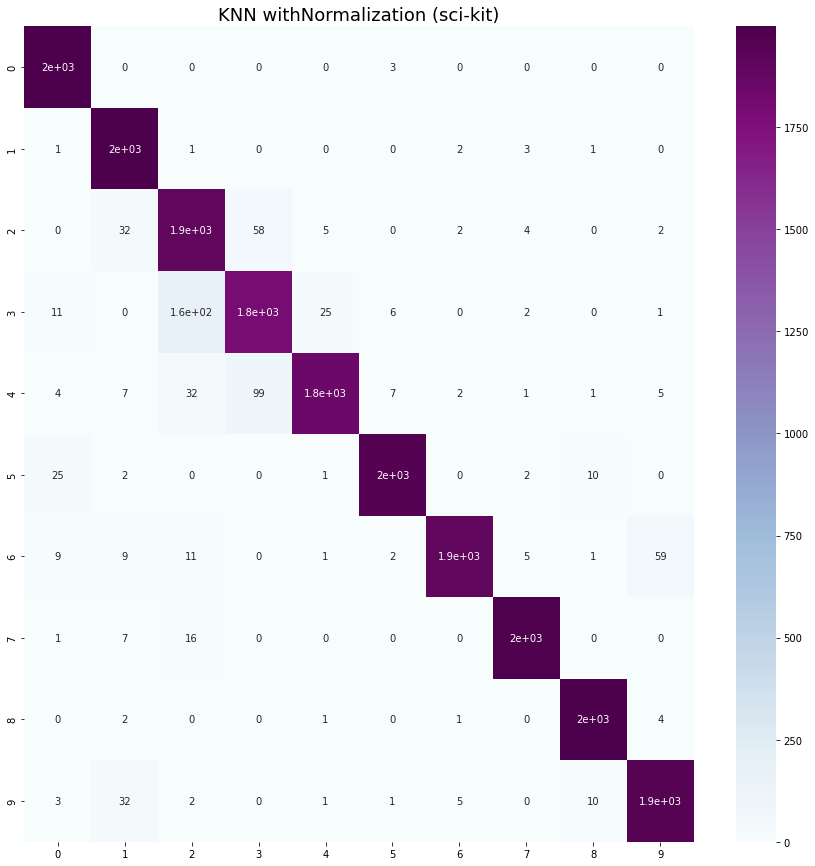

[0.9859294  0.97575312 0.9199806  0.90701799 0.9504644  0.98517215
 0.97215837 0.98973203 0.99227895 0.96888225]


In [12]:
plt.figure(figsize = (15,15))
sns.heatmap(confusion_matrix(Y_test, y_predict), annot=True, cmap="BuPu")
plt.title("KNN withNormalization (sci-kit)", fontsize = 18)
plt.show()
print(f1_score(Y_test, y_predict, average=None))